## Homework_2
## Transfer_Learning
#### Tasks

* Download Cat vs Dogs Kaagle [Competiton](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/overview) dataset
* Print Statistics about counts,labels and shapes, plot random images
* Write data generator(for train, and val), plot results and choose good parameters for data augmantation
* Use Keras VGG-16 pre-trained model, for first froze convolutional base, build and train your classifier part
* Unfroze some layers(Do experiments)
* Try same with ResNet50
* Finally, get more than 95% accuracy

### Imports

In [234]:
import os
from tqdm import tqdm
import shutil
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import pandas as pd
import seaborn as sns
from tensorflow.keras import backend as K
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as Layers

### Paths settings

In [2]:

train_path = "../../../../cat_vs_dog_dataset/train/" #change your path

train_dogs_path = "train_images/dog"
train_cats_path = "train_images/cat"
val_dogs_path = "val_images/dog"
val_cats_path = "val_images/cat"

train_im_ids = os.listdir(train_path)

In [3]:
train_images = "train_images"
val_images = "val_images"

### Split into train and validation

In [4]:
classes = np.array([id_.split(".")[0] for id_ in train_im_ids])
X_train, X_test, y_train, y_test = train_test_split(train_im_ids,classes,test_size = 0.3,random_state = 5) #keep seed for random

In [21]:
np.unique(classes,return_counts=True)


(array(['cat', 'dog'], dtype='<U3'), array([12500, 12500]))

In [24]:
len(X_train)

17500

In [22]:
np.unique(y_train,return_counts=True)


(array(['cat', 'dog'], dtype='<U3'), array([8793, 8707]))

In [5]:
train_dogs_ids = np.take(X_train,np.where(y_train == "dog")[0])
train_cats_ids = np.take(X_train,np.where(y_train == "cat")[0])

val_dogs_ids = np.take(X_test,np.where(y_test == "dog")[0])
val_cats_ids = np.take(X_test,np.where(y_test == "cat")[0])

### Make directories for train cats/dogs and val cats/dogs

In [6]:
os.makedirs(train_dogs_path)
os.makedirs(train_cats_path)

os.makedirs(val_dogs_path)
os.makedirs(val_cats_path)

### Copy to directories

In [12]:
def copy_to(source,dest,ids):
    for id_ in tqdm(ids):
        shutil.copy2(source+id_,dest)
        

In [13]:
copy_to(train_path,train_dogs_path,train_dogs_ids)

100%|██████████| 8707/8707 [00:00<00:00, 13233.54it/s]


In [14]:
copy_to(train_path,train_cats_path,train_cats_ids)

100%|██████████| 8793/8793 [00:00<00:00, 13773.72it/s]


In [15]:
copy_to(train_path,val_dogs_path,val_dogs_ids)

100%|██████████| 3793/3793 [00:00<00:00, 13102.07it/s]


In [16]:
copy_to(train_path,val_cats_path,val_cats_ids)

100%|██████████| 3707/3707 [00:00<00:00, 13822.26it/s]


### Shapes distribution 

In [60]:
def shapes_distr(ids,path,size):
    W = []
    H = []
    for i in tqdm(range(size)):
        indx = np.random.choice(len(ids))
        id_ = ids[indx]
        img = plt.imread(path+id_)
        H.append(img.shape[0])
        W.append(img.shape[1])
    return W,H

In [45]:
img = plt.imread(train_path+train_im_ids[0])

In [61]:
W,H = shapes_distr(train_im_ids,train_path,1000)

100%|██████████| 1000/1000 [00:04<00:00, 243.34it/s]


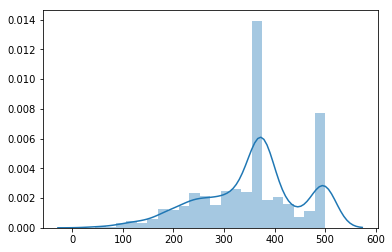

In [62]:
sns.distplot(H);

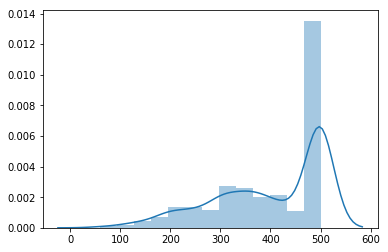

In [63]:
sns.distplot(W);

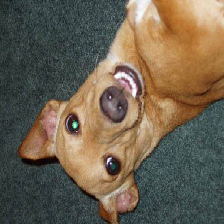

In [82]:
img_path = train_path+train_im_ids[3]
image = load_img(img_path,target_size=(224,224))
img = img_to_array(image)
image